In [28]:
import numpy as np


r2 = np.load('r2_convlstm_1layer.npy')
r2_wandb = np.load('r2_convlstm_1layer_wandb.npy')
r2_3 = np.load('r2_convlstm_wandb.npy')
r2_4 = np.load('r2_unet_wandb.npy')
mask = np.load('mask.npy')

"\na = np.multiply(r2_4-r2_wandb,mask[:112,:112])\na[a==0] = np.nan\nplt.imshow(a, vmin=0, vmax=1, cmap='jet')\nplt.colorbar()\n"

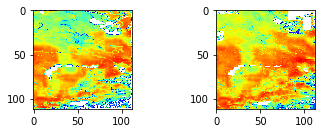

In [33]:
import matplotlib.pyplot as plt

r2[r2==0] = np.nan
r2_4[r2_4==0] = np.nan

plt.subplot(2,2,1)
plt.imshow(r2, vmin=0, vmax=1, cmap='jet')
plt.subplot(2,2,2)
plt.imshow(r2_4, vmin=0, vmax=1, cmap='jet')

"""
a = np.multiply(r2_4-r2_wandb,mask[:112,:112])
a[a==0] = np.nan
plt.imshow(a, vmin=0, vmax=1, cmap='jet')
plt.colorbar()
"""

In [13]:
import numpy as np

a = np.random.random((4,1))
from sklearn.impute import SimpleImputer,KNNImputer

from sklearn.preprocessing import MinMaxScaler 

# interplot
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
b = imp.fit_transform(a)

scaler = MinMaxScaler()
b = scaler.fit_transform(a)

imp = KNNImputer(missing_values=np.nan)
b = imp.fit_transform(a)

In [14]:
a[3,0] = np.nan

In [15]:
a

array([[0.34022483],
       [0.97677224],
       [0.4630946 ],
       [       nan]])

In [16]:
b

array([[0.34022483],
       [0.97677224],
       [0.4630946 ],
       [0.23994506]])

In [23]:
a = np.random.random((4,2))
from sklearn.impute import SimpleImputer,KNNImputer

from sklearn.preprocessing import MinMaxScaler 

# interplot
a[0,0] = np.nan
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
b = imp.fit_transform(a)


In [24]:
a

array([[       nan, 0.36218465],
       [0.47418762, 0.58222935],
       [0.99504764, 0.04698804],
       [0.92965291, 0.61821232]])

In [25]:
b

array([[0.79962939, 0.36218465],
       [0.47418762, 0.58222935],
       [0.99504764, 0.04698804],
       [0.92965291, 0.61821232]])

In [38]:
import numpy as np

x_1 = np.load('/work/lilu/HRSEPP/hrsepp/data/x_train_1.npy')
y_1 = np.load('/work/lilu/HRSEPP/hrsepp/data/y_train_1.npy')

x_2 = np.load('/work/lilu/HRSEPP/hrsepp/data/x_train_2.npy')
y_2 = np.load('/work/lilu/HRSEPP/hrsepp/data/y_train_2.npy')

x_3 = np.load('/work/lilu/HRSEPP/hrsepp/data/x_train_3.npy')
y_3 = np.load('/work/lilu/HRSEPP/hrsepp/data/y_train_3.npy')

In [27]:
x_1.shape

(1828, 7, 224, 224)

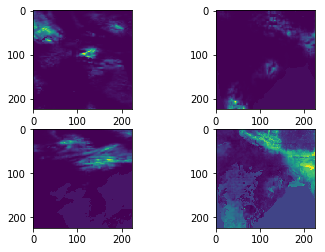

In [41]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.imshow(x_1[0, 0, :,:])

plt.subplot(2,2,2)
plt.imshow(x_2[0, 0, :,:])

plt.subplot(2,2,3)
plt.imshow(x_3[0, 0, :,:])


plt.subplot(2,2,4)
plt.imshow(y_2[0, 0, :,:])

In [40]:
np.isnan(x_3).any()

False

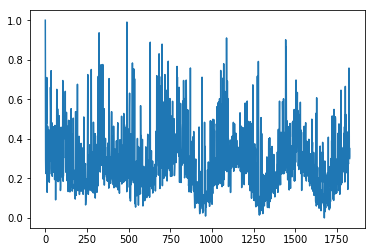

In [67]:
plt.plot(x_1[:,6,94,86])

In [51]:
x_2[x_2>1].any()

True

In [64]:
np.where(x_1>1)

(array([   0,    0,    0, ..., 1826, 1826, 1826]),
 array([6, 6, 6, ..., 6, 6, 6]),
 array([ 94,  94, 155, ..., 166, 167, 168]),
 array([86, 88, 63, ..., 86, 90, 89]))

In [70]:
x_1[1826,6,168,89]

1.0000000000000002

In [72]:
np.min(x_1[:])

0.0

In [1]:
import json
with open('/hard/lilu/SMAP_L4/test/auxiliary.json') as f:
    a = json.load(f)

In [2]:
a.keys()

dict_keys(['Nlat', 'Nlon', 'mask', 'lat_2d', 'lon_2d', 'min_scale', 'max_scale'])

In [14]:
import numpy as np

y_train = np.load('/hard/lilu/.npy')
y_1 = np.load('/hard/lilu/y_test_1.npy')
y_test_pred = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_test_pred.npy')
y_test_ = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_test_.npy')

In [12]:
y_test_pred.shape

(357, 7, 224, 224, 1)

In [13]:
y_1.shape

(366, 1, 224, 224)

In [15]:
y_test_.shape

(357, 7, 224, 224, 1)

In [19]:
r2 = np.full((7, 224, 224), np.nan)
from sklearn.metrics import r2_score
for i in range(7):
    for j in range(224):
        for k in range(224):
            
            r2[i,j,k] = r2_score(y_test_[:, i, j,k,0],y_test_pred[:,i,j,k,0])

In [24]:
r2[2]

array([[-2.60499929e+01, -3.15223423e+01, -1.66570506e+01, ...,
        -5.20320685e+00, -8.97726322e+00, -5.55776050e-01],
       [-6.83645036e+00, -3.76423077e+01, -2.92603815e+00, ...,
        -5.71217529e+00, -5.19710056e+00, -9.72626758e+00],
       [-1.81107066e+01, -2.67733266e+01, -4.73979127e+00, ...,
        -6.17972361e+00, -6.48503487e+00, -8.11502763e+00],
       ...,
       [-4.99854922e-01,  9.89675443e-02,  2.06363407e-01, ...,
        -9.39444741e-01, -1.51383090e+00, -7.69641629e-01],
       [-3.96916442e-01, -1.44643776e+00, -7.95782663e-01, ...,
         1.28943219e-01, -2.78598574e-01, -3.08873334e-01],
       [ 1.54969862e-01, -2.78386703e-01, -1.20126061e-02, ...,
         1.83324048e-01, -1.55493370e-01, -1.26599964e+00]])

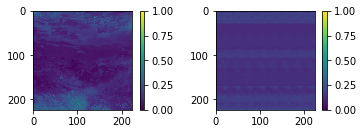

In [27]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.imshow(y_test_[0, 0, :,:,0],vmin=0, vmax=1)
plt.colorbar()


plt.subplot(2,2,2)
plt.imshow(y_test_pred[0, 0, :,:,0],vmin=0, vmax=1)
plt.colorbar()

In [1]:
import numpy as np

x_tr = np.load('/work/lilu/HRSEPP/hrsepp/IO/x_tr.npy')
x_tr_1 = np.load('/work/lilu/HRSEPP/hrsepp/IO/x_tr_1.npy')

In [29]:
x_tr.shape

(1819, 1, 8, 224, 224)

In [30]:
x_tr_1.shape

(1819, 1, 224, 224, 8)

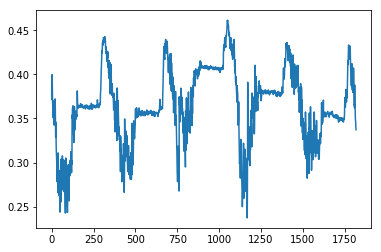

In [9]:
import matplotlib.pyplot as plt

plt.plot(x_tr[:,0,0,0,7])
#plt.plot(x_tr_1[:,0,0,0,2])


In [128]:
y_train = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_train.npy')
y_train_pred = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_train_pred.npy')
y_test = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_test.npy')
y_test_pred = np.load('/work/lilu/HRSEPP/hrsepp/IO/y_test_pred.npy')

In [129]:
y_train.shape

(1824, 1, 224, 224, 1)

In [130]:
y_test.shape

(362, 1, 224, 224, 1)

In [131]:
y_test_pred.shape

(362, 1, 224, 224, 1)

In [132]:
y_train_pred.shape

(1824, 1, 224, 224, 1)

In [133]:
r2_train = np.full((7, 224, 224), np.nan)
r2_test = np.full((7, 224, 224), np.nan)

r_train = np.full((7, 224, 224), np.nan)
r_test = np.full((7, 224, 224), np.nan)

rmse_train = np.full((7, 224, 224), np.nan)
rmse_test = np.full((7, 224, 224), np.nan)

from sklearn.metrics import r2_score, mean_squared_error

for i in range(1):
    for j in range(224):
        for k in range(224):
            
            r2_train[i,j,k] = r2_score(y_train[:, i, j,k,0],y_train_pred[:,i,j,k,0])
            r2_test[i,j,k] = r2_score(y_test[:, i, j,k,0],y_test_pred[:,i,j,k,0])
            
            r_train[i,j,k] = np.corrcoef(y_train[:, i, j,k,0],y_train_pred[:,i,j,k,0])[0,1]
            r_test[i,j,k] = np.corrcoef(y_test[:, i, j,k,0],y_test_pred[:,i,j,k,0])[0,1]
            
            rmse_train[i,j,k] = np.sqrt(mean_squared_error(y_train[:, i, j,k,0],y_train_pred[:,i,j,k,0]))
            rmse_test[i,j,k] = np.sqrt(mean_squared_error(y_test[:, i, j,k,0],y_test_pred[:,i,j,k,0]))

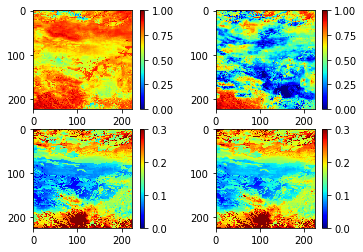

In [45]:
import matplotlib.pyplot as plt

plt.subplot(2,2,1)
plt.imshow(r_train[0,:,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()


plt.subplot(2,2,2)
plt.imshow(r_test[3, :,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(np.nanmean(y_test[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(np.nanmean(y_test_pred[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

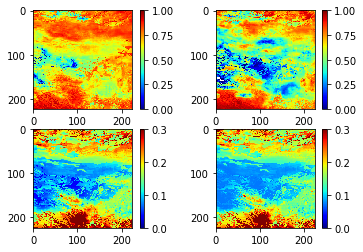

In [54]:
plt.subplot(2,2,1)
plt.imshow(r_train[0,:,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()


plt.subplot(2,2,2)
plt.imshow(r_test[0, :,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(np.nanmean(y_test[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(np.nanmean(y_test_pred[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

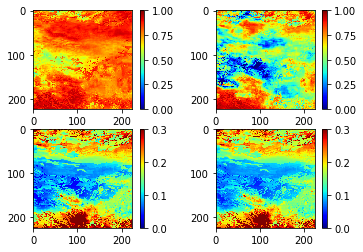

In [138]:
plt.subplot(2,2,1)
plt.imshow(r_train[0,:,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()


plt.subplot(2,2,2)
plt.imshow(r_test[0, :,:],vmin=0, vmax=1, cmap='jet')
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(np.nanmean(y_test[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(np.nanmean(y_test_pred[:, 0,:,:,0],axis=0),vmin=0, vmax=0.3, cmap='jet')
plt.colorbar()

In [114]:
rmse_test

array([[[0.02380052, 0.02646065, 0.02469968, ...,        nan,
                nan,        nan],
        [0.02641135, 0.02445502, 0.02844631, ...,        nan,
                nan,        nan],
        [0.02249629, 0.01888795, 0.01927839, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [   

0.07917745896932149

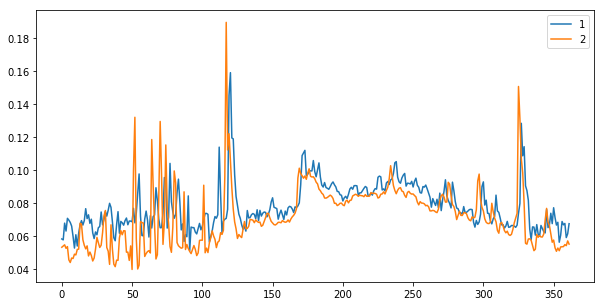

In [136]:
plt.figure(figsize=(10,5))
plt.plot(y_test_pred[:, 0, 100, 100, 0])
plt.plot(y_test[:, 0, 100, 100, 0])

plt.legend(['1','2'])
r2_test[0,100,100]